### DAQA

In [2]:
import pandas as pd
acde_works = pd.read_csv("data/acde_work.csv")
daqa_works = acde_works[acde_works["data_source"].str.contains("DAQA")]

/var/folders/gm/qd1sm1x551zf2qwxk06w8wpw0000gn/T/ipykernel_70447/3166044520.py:2: DtypeWarning: Columns (5,9,12,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  acde_works = pd.read_csv("data/acde_work.csv")


In [ ]:
import json
import ast

row_coverages = pd.DataFrame()

for idx,row in daqa_works.iterrows():
    row_coverage = pd.json_normalize(json.loads(row["coverage_range"]))
    # row_coverage["typology"] = row["typology"]
    row_coverage["typologies"] = row["typologies"]
    row_coverages = pd.concat([row_coverages, row_coverage])

row_coverages_nonnull = row_coverages[["typologies", "place.geo_coord.latitude", "place.geo_coord.longitude"]]\
    .dropna(subset=["place.geo_coord.latitude", "place.geo_coord.longitude"])

row_coverages_nonnull["typologie_0"] = row_coverages_nonnull.typologies.apply(lambda x: ast.literal_eval(x)[0])

# rename columns 
row_coverages_nonnull = row_coverages_nonnull.rename(columns={"place.geo_coord.latitude": "latitude", "place.geo_coord.longitude": "longitude"})

In [13]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1Ijoia2FiaXJtYW5hbmRoYXIiLCJhIjoiY2w3ZTMxYWxpMDNtajN3bHZvbHJyYThueiJ9.DpnmOuQdHCWU_crpaEZqAg")
fig = px.scatter_mapbox(row_coverages_nonnull, lat="latitude", lon="longitude", color="typologie_0", 
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6, height=720,width=1440)
fig.show()

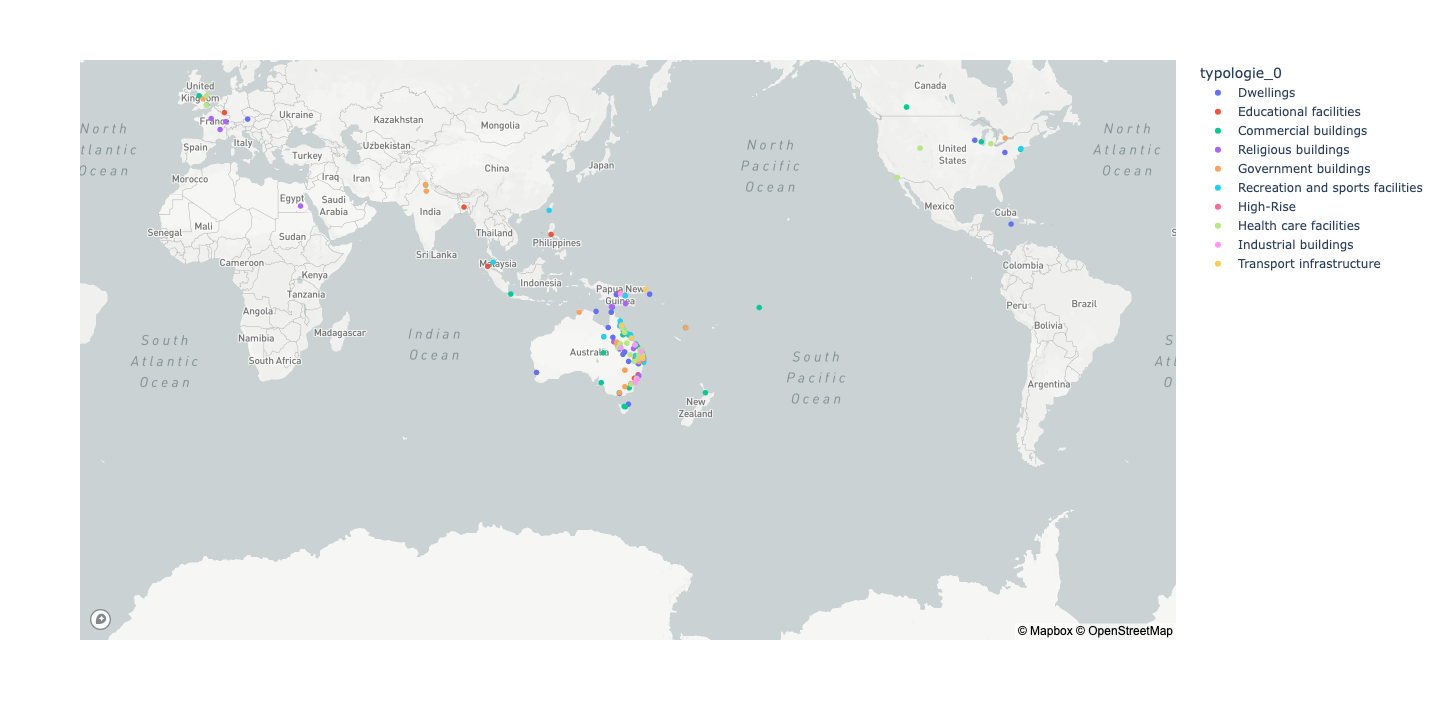

In [5]:
from IPython.display import Image
Image(filename='images/daqa_map_typologies_world.png')

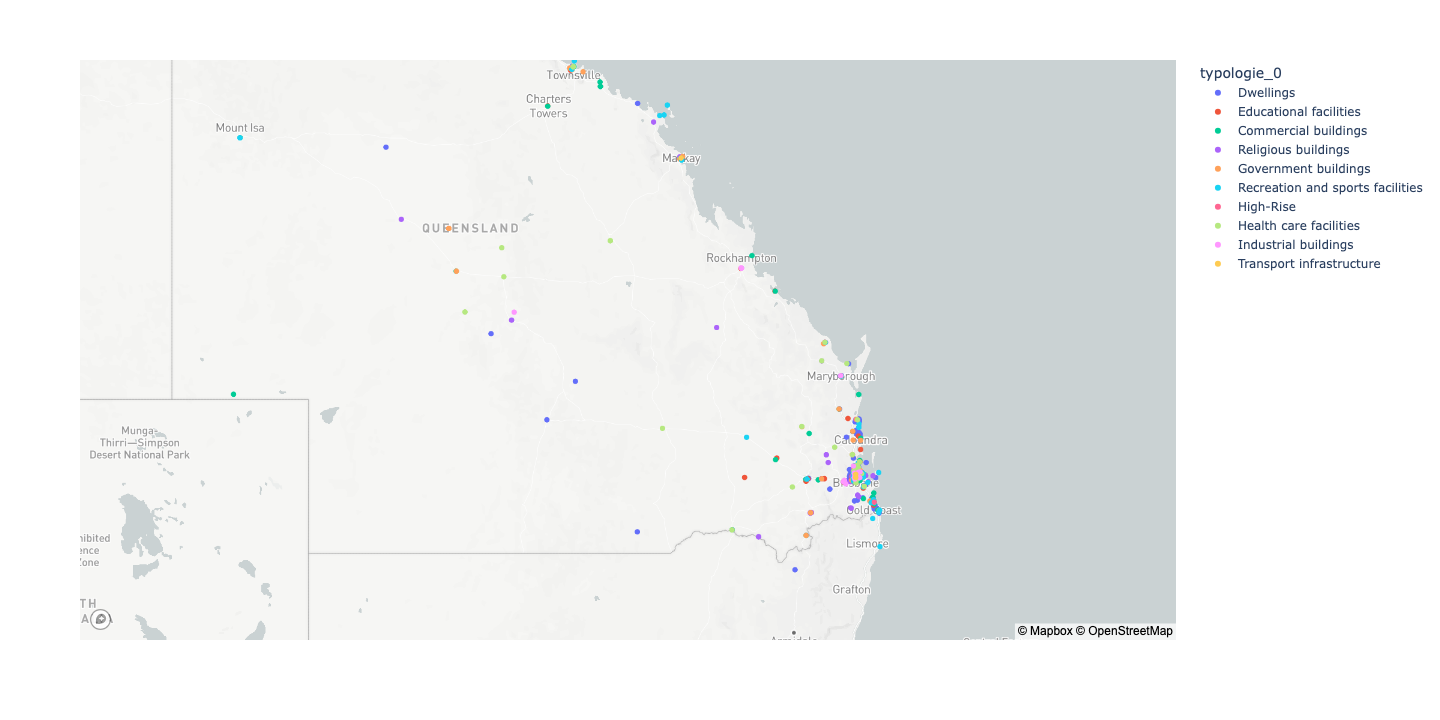

In [10]:
from IPython.display import Image
Image(filename='images/daqa_map_typologies_qld.png')

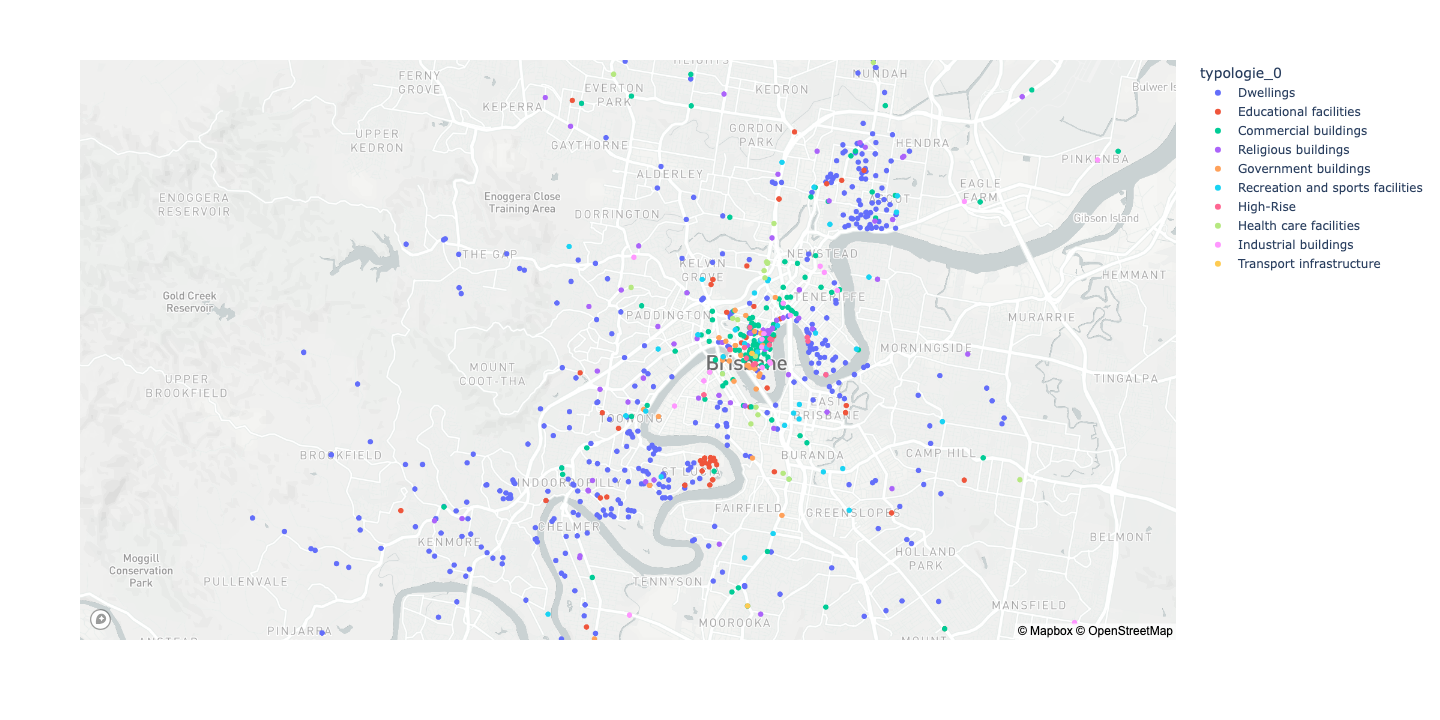

In [14]:
from IPython.display import Image
Image(filename='images/daqa_map_typologies_brisbane.png')

In [29]:
row_coverages_years = row_coverages[["typologies", "date_range.date_end.year"]].dropna()
row_coverages_years["typologie_0"] = row_coverages_years.typologies.apply(lambda x: ast.literal_eval(x)[0])
row_coverages_years = row_coverages_years.rename(columns={"date_range.date_end.year": "completion"})
row_coverages_years["completion"] = row_coverages_years["completion"].astype(int)
row_coverages_years

,typologies,completion,typologie_0
0,"[""Religious buildings""]",1935,Religious buildings
0,"[""Commercial buildings""]",1988,Commercial buildings
0,"[""Commercial buildings""]",1935,Commercial buildings
0,"[""Commercial buildings""]",1960,Commercial buildings
0,"[""Recreation and sports facilities""]",1987,Recreation and sports facilities
...,...,...,...
0,"[""Commercial buildings""]",1995,Commercial buildings
0,"[""Commercial buildings""]",2003,Commercial buildings
0,"[""Commercial buildings""]",1993,Commercial buildings
0,"[""Recreation and sports facilities"", ""Dwellings""]",2007,Recreation and sports facilities


In [31]:
time_series_typologies={}
dict_year_time={}

for idx, event in row_coverages_years.iterrows():
    if event["completion"] not in dict_year_time:
        dict_year_time[event["completion"]]=1
    else:
        dict_year_time[event["completion"]]+=1
    if event["typologie_0"] not in time_series_typologies:
        time_series_typologies[event["typologie_0"]]={event["completion"]:1}
    else:
        if event["completion"] not in time_series_typologies[event["typologie_0"]]:
            time_series_typologies[event["typologie_0"]][event["completion"]]=1
        else:
            time_series_typologies[event["typologie_0"]][event["completion"]]+=1                                                 

In [34]:
import collections

percentage_typologies_temporal={}

for category in row_coverages_years["typologie_0"].unique():
    for year in time_series_typologies[category]:
        if year in dict_year_time:
            if category not in percentage_typologies_temporal:
                percentage_typologies_temporal[category]={year:(time_series_typologies[category][year]/dict_year_time[year]) * 100}
            else: 
                percentage_typologies_temporal[category][year]=time_series_typologies[category][year]/dict_year_time[year] * 100
        else:
            print("Error")

year_grouping=list(range(1900,2030,10))

grouped_typo_temp={}
for category in percentage_typologies_temporal:
    try:
        ordered_category_dict=dict(collections.OrderedDict(sorted(percentage_typologies_temporal[category].items())))
        for idx,start_year in enumerate(year_grouping):
            agg_percentage=sum([v for k,v in ordered_category_dict.items() if k >= start_year and k < year_grouping[idx+1]])
            if category not in grouped_typo_temp:
                grouped_typo_temp[category]={str(start_year)+"-"+str(year_grouping[idx+1]):agg_percentage/10}
            else:
                grouped_typo_temp[category][str(start_year)+"-"+str(year_grouping[idx+1])]=agg_percentage/10
    except:
        continue

In [35]:
import plotly.graph_objects as go
fig = go.Figure()
for category in grouped_typo_temp:
    df_category=pd.DataFrame(grouped_typo_temp[category].items(),columns=["Year","Percentage"])
    fig.add_trace(go.Scatter(x=df_category["Year"], y=df_category["Percentage"],
                    mode='lines+markers',
                    name=category))
fig.update_layout(height=540,width=1080)

### DAAO

In [1]:
import pandas as pd
acde_events = pd.read_csv("data/acde_event.csv")
daao_exhibitions = acde_events[(acde_events["data_source"].str.contains("DAAO")) & (acde_events["types"].str.contains("exhibition"))]

/var/folders/gm/qd1sm1x551zf2qwxk06w8wpw0000gn/T/ipykernel_71694/2324402747.py:2: DtypeWarning: Columns (4,5,7,8,9,11,15,16,17,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  acde_events = pd.read_csv("data/acde_event.csv")


In [ ]:
import json

row_coverages = pd.DataFrame()
for idx,row in daao_exhibitions.iterrows():
    try:
        row_coverage = pd.json_normalize(json.loads(row["coverage_ranges"]))
        row_coverages = pd.concat([row_coverages, row_coverage])
    except:
        continue

row_coverages_nonnull = row_coverages[["date_range.date_start.year",'place.geo_coord.latitude', 'place.geo_coord.longitude']].dropna()

# change columns to start_year, latitude, longitude
row_coverages_nonnull = row_coverages_nonnull.rename(columns={"date_range.date_start.year": "start_year", "place.geo_coord.latitude": "latitude", "place.geo_coord.longitude": "longitude"})
row_coverages_nonnull.start_year = row_coverages_nonnull.start_year.astype(int)

In [18]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1Ijoia2FiaXJtYW5hbmRoYXIiLCJhIjoiY2w3ZTMxYWxpMDNtajN3bHZvbHJyYThueiJ9.DpnmOuQdHCWU_crpaEZqAg")
df_daoo_relevant_events_exb=row_coverages_nonnull[row_coverages_nonnull['start_year'].between(1900,2022)]

fig = px.scatter_mapbox(df_daoo_relevant_events_exb, lat="latitude", lon="longitude", color="start_year", size_max=15,zoom=1,height=680)
fig.show()

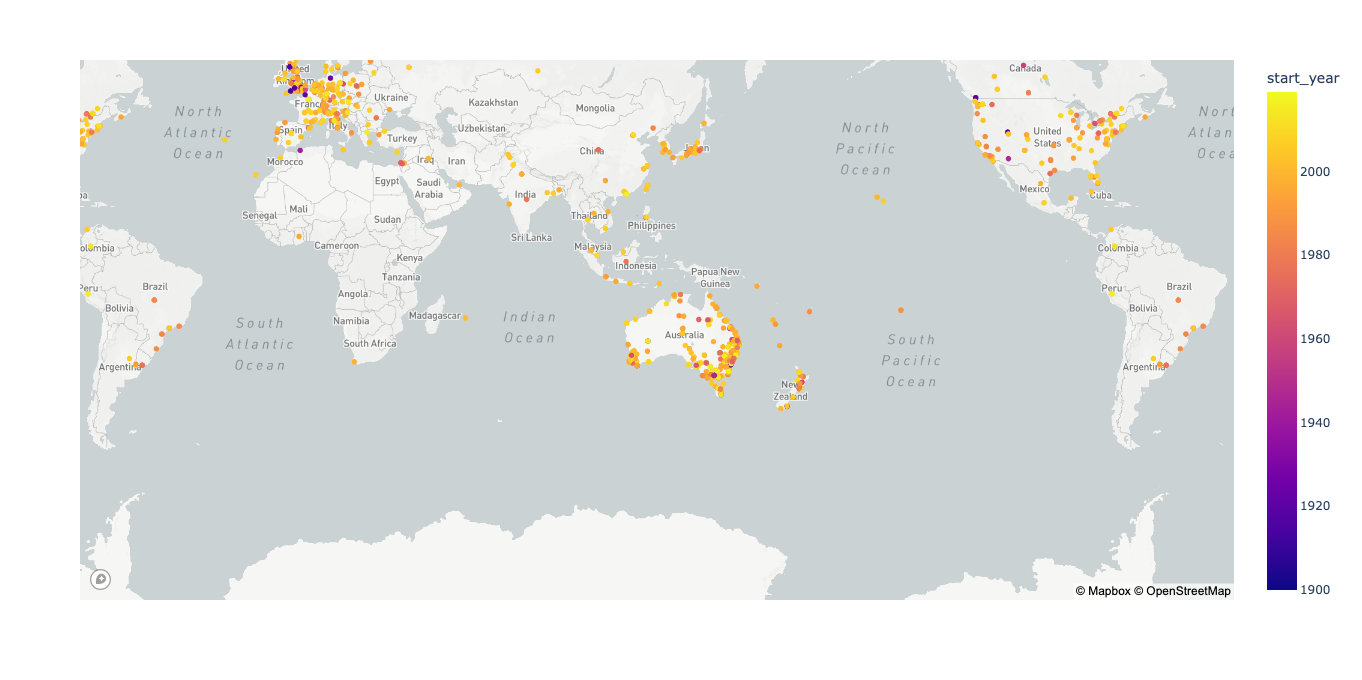

In [20]:
from IPython.display import Image
Image(filename='images/daao_exhibitions_map.png')